# Model Generation

In [1]:
import numpy
import pandas
import keras 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

In [2]:
from google.colab import drive
drive.mount('/gdrive')
!ls /gdrive

Mounted at /gdrive
MyDrive


In [4]:
dataframe = pandas.read_csv("composite.csv")
dataframe = dataframe.replace({'?': numpy.nan}).dropna()
dataset = dataframe.values

X = dataset[:,:63]
Y = dataset[:,63] 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

model = Sequential()
model.add(Dense(28, input_dim=63, activation='relu', kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_constraint=maxnorm(3), kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="uniform"))
model.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_Train, Y_Train, epochs=300, batch_size=10)

scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/300
351/351 [==============================] - 2s 3ms/step - loss: 0.5289 - accuracy: 0.8169
Epoch 2/300
351/351 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8172
Epoch 3/300
351/351 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8181
Epoch 4/300
351/351 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8184
Epoch 5/300
351/351 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8206
Epoch 6/300
351/351 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8195
Epoch 7/300
351/351 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8204
Epoch 8/300
351/351 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8204
Epoch 9/300
351/351 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8192
Epoch 10/300
351/351 [==============================] - 1s 2ms/step - loss: 0.3305 - accura

# Experimentation

## Data Generation

In [5]:
import random as r
import pandas as pd

NUM_GROUPS = 10000

def random_age_gen():
    return [r.randint(18, 65)]

def random_nominal(size):
    output = [0] * size
    output[r.randint(0, size - 1)] = 1
    return output

def generate_age_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constant = [0, 0, 40, 0] + \
                   random_nominal(7) + \
                   random_nominal(16) + \
                   random_nominal(7) + [0] + \
                   random_nominal(14) + \
                   random_nominal(6) + \
                   random_nominal(5) + \
                   random_nominal(2)
        for age in range(20, 66, 5):
            data = [age] + constant
            total_data.append(data)
    with open("/content/age.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_workclass_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0]

        constantB = random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 7):
            onehot = [0] * 7
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/workclass.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_education_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7)

        constantB = random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 16):
            onehot = [0] * 16
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/education.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_marital_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16)

        constantB = [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 7):
            onehot = [0] * 7
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/marital.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_job_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0]

        constantB = random_nominal(6) + \
                    random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 14):
            onehot = [0] * 14
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/job.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_relationship_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14)

        constantB = random_nominal(5) + \
                    random_nominal(2)
        for i in range(0, 6):
            onehot = [0] * 6
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/relationship.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_race_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constantA = random_age_gen() + \
                    [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6)

        constantB = random_nominal(2)
        for i in range(0, 5):
            onehot = [0] * 5
            onehot[i] = 1
            data = constantA + onehot + constantB
            total_data.append(data)
    with open("/content/race.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_gender_data():
    total_data = []
    for i in range(NUM_GROUPS):
        constant = random_age_gen() + \
                   [0, 0, 40, 0] + \
                    random_nominal(7) + \
                    random_nominal(16) + \
                    random_nominal(7) + [0] + \
                    random_nominal(14) + \
                    random_nominal(6) + \
                    random_nominal(5)
        for i in range(0, 2):
            onehot = [0] * 2
            onehot[i] = 1
            data = constant + onehot
            total_data.append(data)
    with open("/content/gender.csv", 'w') as f:
      pd.DataFrame(total_data).to_csv(f, index=False, header=False)

def generate_new_datasets():
  generate_age_data()
  generate_workclass_data()
  generate_education_data()
  generate_marital_data()
  generate_job_data()
  generate_relationship_data()
  generate_race_data()
  generate_gender_data()

generate_new_datasets()

## Predictions

In [6]:
THRESHOLD = 0.22

def categorize_data(dataset):
  dataset[dataset <= THRESHOLD] = 0
  dataset[dataset > THRESHOLD] = 1
  return dataset
  
def predict_data(filepath, input_headers):
  dataframe = pandas.read_csv(filepath, header=None)
  dataframe = dataframe.replace({'?': numpy.nan}).dropna()
  dataset = dataframe.values

  output_data = {}

  size = len(input_headers)
  for i in range(size):
    filtered = dataset[i::size]
    results = categorize_data(model.predict(filtered, verbose = 0))

    header = input_headers[i]
    count = numpy.count_nonzero(results)
    ratio = (count / NUM_GROUPS)
    output_data[header] = ratio
    # print(f"{header}: {count} ({ratio})")
  
  return output_data

def plot_data(data):
  names = list(data.keys())
  values = list(data.values())

  plt.bar(range(len(data)), values, tick_label=names)
  plt.xticks(rotation=90)
  plt.xlabel("Categories")
  plt.ylabel(f"Predicted Ratio Earning >= 50k (out of {NUM_GROUPS})")
  plt.show()

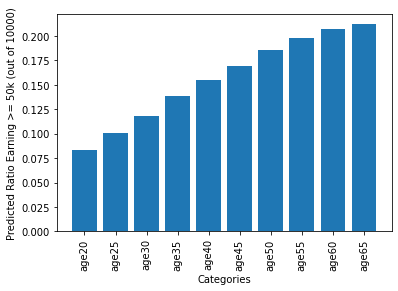

In [7]:
def predict_age():
  return predict_data("/content/age.csv", ['age20', 'age25', 'age30', 'age35', 'age40', 'age45', 'age50', 'age55', 'age60', 'age65'])

data = predict_age()
plot_data(data)

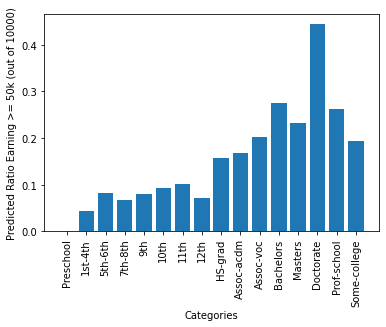

In [8]:
def predict_education():
  data = predict_data("/content/education.csv", ['10th','11th','12th','1st-4th','5th-6th','7th-8th','9th','Assoc-acdm',
                                                'Assoc-voc','Bachelors','Doctorate','HS-grad','Masters','Preschool',
                                                'Prof-school','Some-college'])
  reorder = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Assoc-acdm','Assoc-voc',
            'Bachelors','Masters','Doctorate','Prof-school','Some-college']
  return {k: data[k] for k in reorder}

data = predict_education()
plot_data(data)

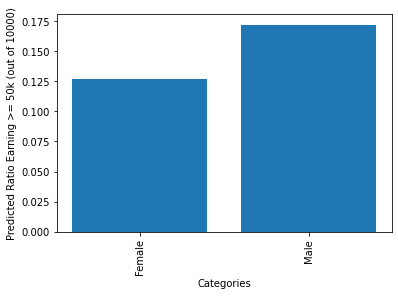

In [9]:
def predict_gender():
  return predict_data("/content/gender.csv", ['Female', 'Male'])

data = predict_gender()
plot_data(data)

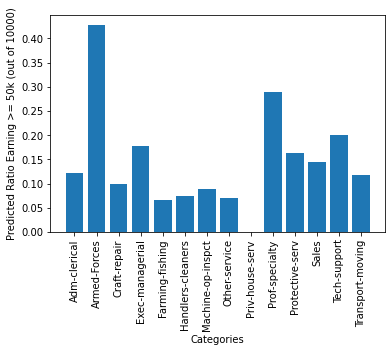

In [10]:
def predict_job():
  return predict_data("/content/job.csv", ['Adm-clerical','Armed-Forces','Craft-repair','Exec-managerial','Farming-fishing',
                                          'Handlers-cleaners','Machine-op-inspct','Other-service','Priv-house-serv','Prof-specialty',
                                          'Protective-serv','Sales','Tech-support','Transport-moving'])

data = predict_job()
plot_data(data)

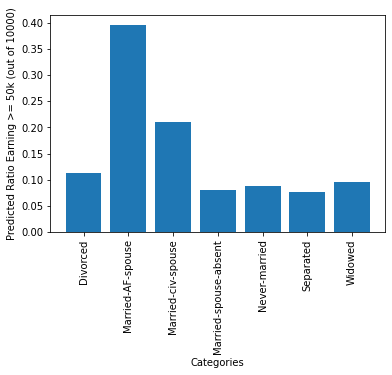

In [11]:
def predict_marital():
  return predict_data("/content/marital.csv", ['Divorced','Married-AF-spouse','Married-civ-spouse',
                                              'Married-spouse-absent','Never-married','Separated','Widowed'])

data = predict_marital()
plot_data(data)

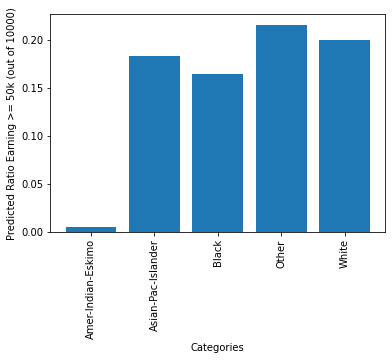

In [12]:
def predict_race():
  return predict_data("/content/race.csv", ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'])

data = predict_race()
plot_data(data)

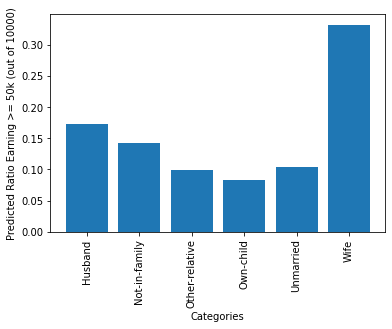

In [13]:
def predict_relationship():
  return predict_data("/content/relationship.csv", ['Husband','Not-in-family','Other-relative','Own-child','Unmarried','Wife'])

data = predict_relationship()
plot_data(data)

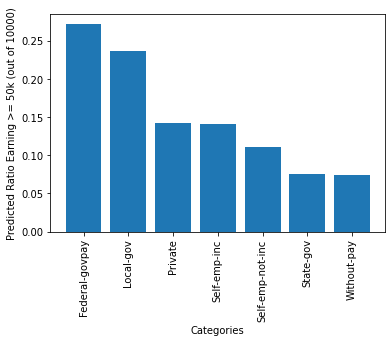

In [14]:
def predict_workclass():
  return predict_data("/content/workclass.csv", ['Federal-govpay','Local-gov','Private','Self-emp-inc','Self-emp-not-inc',
                                          'State-gov','Without-pay'])

data = predict_workclass()
plot_data(data)

In [15]:
def merge_dicts(d1, d2):
  output = {}
  for key, value in d1.items():

    if not isinstance(d1[key], list):
      output[key] = [d1[key]] + [d2[key]]
    else:
      output[key] = d1[key] + [d2[key]]
  return output

def plot_multiple_data(data):
  index = 0
  styles = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'b:', 'g:']
  for key, value in data.items():
    plt.plot(value, styles[index])
    index = index + 1
  plt.legend(data.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel("Generation #")
  plt.ylabel(f"Predicted Ratio Earning >= 50k (out of {NUM_GROUPS})")
  plt.show()

def plot_averages(data):
  names = []
  values = []
  for key, value in data.items():
    names.append(key)
    values.append(sum(value) / len(value))
  plt.bar(range(len(data)), values, tick_label=names)
  plt.xticks(rotation=90)
  plt.xlabel("Categories")
  plt.ylabel(f"Predicted Ratio Earning >= 50k (out of {NUM_GROUPS})")
  plt.show()


In [16]:
print("Generating dataset #1...")
generate_new_datasets()
print("Predicting...")
age_dict = predict_age()
education_dict = predict_education()
gender_dict = predict_gender()
job_dict = predict_job()
marital_dict = predict_marital()
race_dict = predict_race()
relationship_dict = predict_relationship()
workclass_dict = predict_workclass()
print("Done")

for trial in range(9):
  print(f"Generating dataset #{trial + 2}...")
  generate_new_datasets()

  print("Predicting...")
  age_dict = merge_dicts(age_dict, predict_age())
  education_dict = merge_dicts(education_dict, predict_education())
  gender_dict = merge_dicts(gender_dict, predict_gender())
  job_dict = merge_dicts(job_dict, predict_job())
  marital_dict = merge_dicts(marital_dict, predict_marital())
  race_dict = merge_dicts(race_dict, predict_race())
  relationship_dict = merge_dicts(relationship_dict, predict_relationship())
  workclass_dict = merge_dicts(workclass_dict, predict_workclass())
  print("Done")

Generating dataset #1...
Predicting...
Done
Generating dataset #2...
Predicting...
Done
Generating dataset #3...
Predicting...
Done
Generating dataset #4...
Predicting...
Done
Generating dataset #5...
Predicting...
Done
Generating dataset #6...
Predicting...
Done
Generating dataset #7...
Predicting...
Done
Generating dataset #8...
Predicting...
Done
Generating dataset #9...
Predicting...
Done
Generating dataset #10...
Predicting...
Done


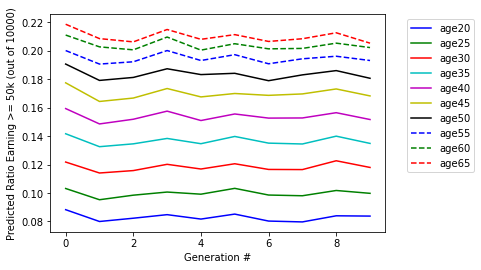

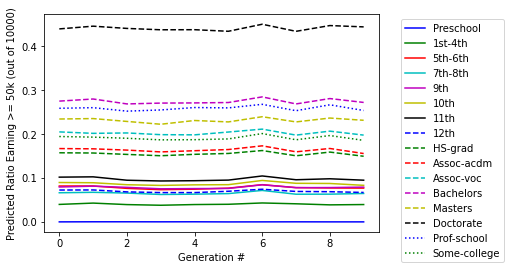

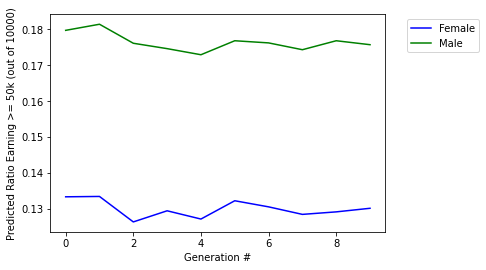

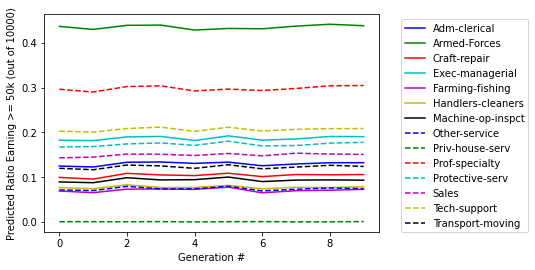

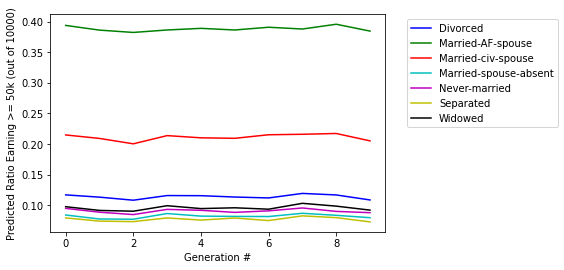

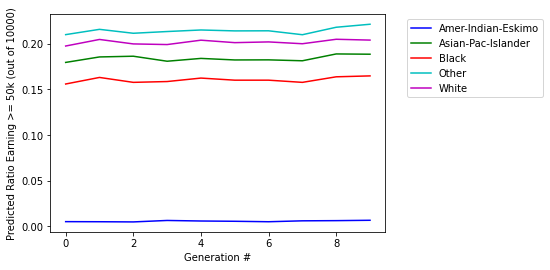

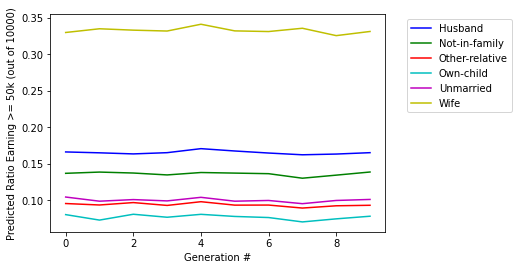

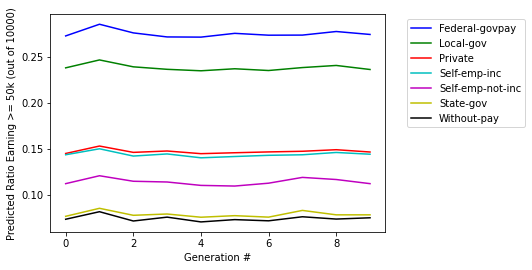

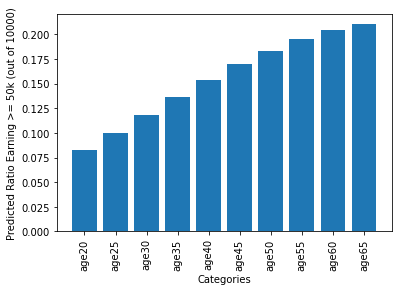

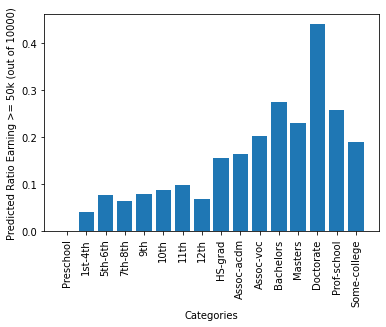

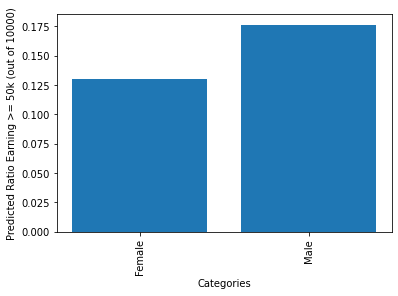

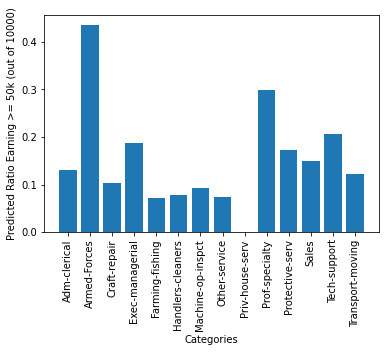

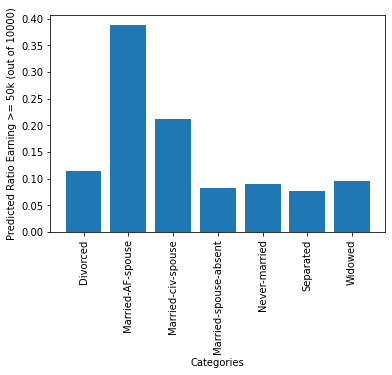

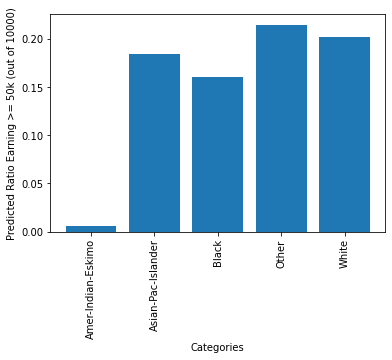

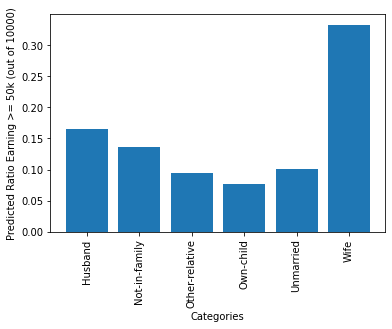

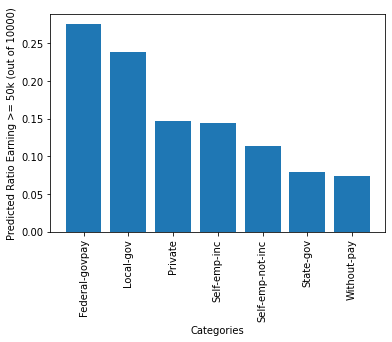

In [17]:
plot_multiple_data(age_dict)
plot_multiple_data(education_dict)
plot_multiple_data(gender_dict)
plot_multiple_data(job_dict)
plot_multiple_data(marital_dict)
plot_multiple_data(race_dict)
plot_multiple_data(relationship_dict)
plot_multiple_data(workclass_dict)

plot_averages(age_dict)
plot_averages(education_dict)
plot_averages(gender_dict)
plot_averages(job_dict)
plot_averages(marital_dict)
plot_averages(race_dict)
plot_averages(relationship_dict)
plot_averages(workclass_dict)